In [ ]:
import geopandas as gpd
import mosqlient
import mapclassify

In [14]:
cols = ["CD_MUN", "NM_MUN"]  # nomes das colunas que você quer
mapa = gpd.read_file("arc/BR_Municipios_2024.shp", columns=cols)
mapa["geometry"] = mapa["geometry"].simplify(0.01, preserve_topology=True)


In [18]:
mapa.info()
mapa["CD_MUN"] = mapa["CD_MUN"].astype("Int32")


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    5573 non-null   object  
 1   NM_MUN    5573 non-null   object  
 2   geometry  5573 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


In [27]:
mapa

,CD_MUN,NM_MUN,geometry
0,2504108,Carrapateira,"POLYGON ((-38.33672 -6.99279, -38.31417 -7.023..."
1,1718451,Pugmil,"POLYGON ((-48.91085 -10.53824, -48.93909 -10.5..."
2,2104206,Fortuna,"POLYGON ((-43.95962 -5.49793, -43.97958 -5.496..."
3,5219902,São Francisco de Goiás,"POLYGON ((-49.29477 -16.00852, -49.36465 -16.0..."
4,2708600,São Miguel dos Campos,"POLYGON ((-36.0739 -9.70094, -36.07497 -9.6735..."
...,...,...,...
5568,2928307,Santanópolis,"POLYGON ((-38.89706 -12.05585, -38.91499 -11.8..."
5569,1505635,Piçarra,"POLYGON ((-48.65528 -6.65054, -48.8214 -6.7539..."
5570,2904308,Brejões,"POLYGON ((-39.83791 -13.18942, -39.83152 -13.2..."
5571,1713205,Miracema do Tocantins,"POLYGON ((-48.77721 -10.02633, -48.82255 -10.0..."


<Axes: >

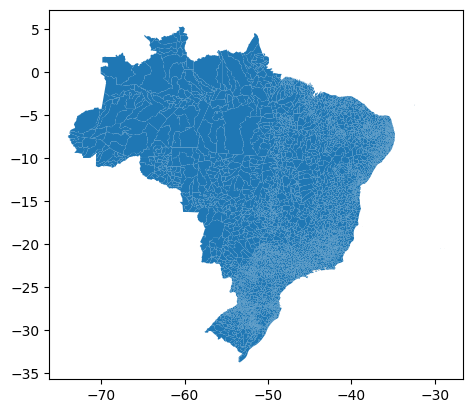

In [10]:
mapa.plot()

In [3]:

dados = mosqlient.get_infodengue(
    api_key = "jhe-sua:bef9877b-dd29-4693-bc1b-cd058f988405",
    disease =  "dengue",
    start_date = "2024-01-01",
    end_date = "2025-01-01",
    uf = 'MG'
)


100%|██████████| 147/147 [00:12<00:00, 11.50requests/s]


In [5]:
dados = dados[["data_iniSE", "SE", "casos","municipio_geocodigo","p_inc100k"]]

In [24]:
dados

,data_iniSE,SE,casos,municipio_geocodigo,p_inc100k
0,2024-12-29,202501,3,3117108,28.823982
1,2024-12-29,202501,2,3113404,2.264724
2,2024-12-29,202501,0,3147501,0.000000
3,2024-12-29,202501,17,3119302,58.153458
4,2024-12-29,202501,0,3148707,0.000000
...,...,...,...,...,...
44351,2024-01-07,202402,1,3171105,30.404379
44352,2024-01-07,202402,0,3170305,0.000000
44353,2024-01-07,202402,2,3123601,7.609481
44354,2024-01-07,202402,3,3165305,44.984257


In [30]:
dfm = mapa.merge(dados, left_on="CD_MUN", right_on="municipio_geocodigo")

In [31]:
dfm

,CD_MUN,NM_MUN,geometry,data_iniSE,SE,casos,municipio_geocodigo,p_inc100k
0,3104106,Arceburgo,"POLYGON ((-46.92078 -21.42713, -47.01151 -21.4...",2024-12-29,202501,3,3104106,32.334557
1,3104106,Arceburgo,"POLYGON ((-46.92078 -21.42713, -47.01151 -21.4...",2024-12-22,202452,0,3104106,0.000000
2,3104106,Arceburgo,"POLYGON ((-46.92078 -21.42713, -47.01151 -21.4...",2024-12-15,202451,1,3104106,10.778185
3,3104106,Arceburgo,"POLYGON ((-46.92078 -21.42713, -47.01151 -21.4...",2024-12-08,202450,1,3104106,10.778185
4,3104106,Arceburgo,"POLYGON ((-46.92078 -21.42713, -47.01151 -21.4...",2024-12-01,202449,0,3104106,0.000000
...,...,...,...,...,...,...,...,...
44351,3135704,Jequitibá,"POLYGON ((-44.076 -19.27613, -44.09887 -19.273...",2024-02-04,202406,182,3135704,3084.745800
44352,3135704,Jequitibá,"POLYGON ((-44.076 -19.27613, -44.09887 -19.273...",2024-01-28,202405,188,3135704,3186.440700
44353,3135704,Jequitibá,"POLYGON ((-44.076 -19.27613, -44.09887 -19.273...",2024-01-21,202404,95,3135704,1610.169400
44354,3135704,Jequitibá,"POLYGON ((-44.076 -19.27613, -44.09887 -19.273...",2024-01-14,202403,39,3135704,661.016970
